# 데이터 확인

In [2]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import warnings

warnings.filterwarnings("ignore", message=".*does not match any known type.*")
np.seterr(all="ignore")
os.environ["PYTHONWARNINGS"] = "ignore"
logging.getLogger("py.warnings").setLevel(logging.ERROR)


In [3]:
# 데이터 로드
train = pd.read_csv('cell2celltrain.csv')
test = pd.read_csv('cell2cellholdout.csv')

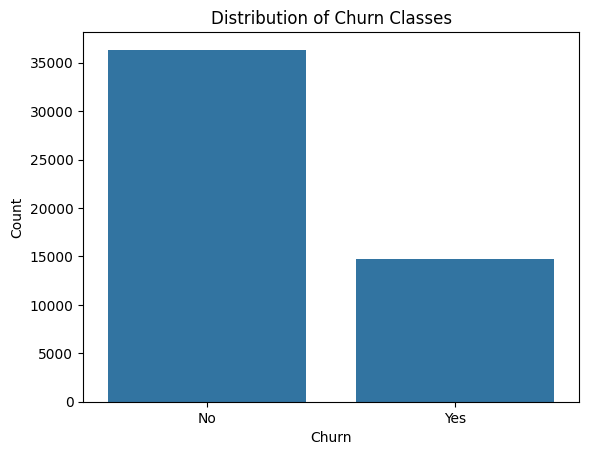

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn 컬럼의 클래스 분포를 countplot으로 시각화
sns.countplot(x='Churn', data=train, order=['No', 'Yes'])
plt.title('Distribution of Churn Classes')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [5]:
train.head()

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000002   Yes           24.00           219.0                  22.0   
1     3000010   Yes           16.99            10.0                  17.0   
2     3000014    No           38.00             8.0                  38.0   
3     3000022    No           82.28          1312.0                  75.0   
4     3000026   Yes           17.14             0.0                  17.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   

   PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0               -19.0  ...                          0            4   
1                 0.0  ...                          0            5   
2                 0.0  ...                          0            6   
3                 8.1  ...                          0            6   
4                -0.2  ...                          0            9   

   OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0              No                          0            30   
1              No                          0            30   
2              No                          0       Unknown   
3              No                          0            10   
4              No                          1            10   

   MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                      Yes     1-Highest   Suburban  Professional   
1                       No      4-Medium   Suburban  Professional   
2                       No        3-Good       Town        Crafts   
3                       No      4-Medium      Other         Other   
4                       No     1-Highest      Other  Professional   

   MaritalStatus  
0             No  
1            Yes  
2            Yes  
3             No  
4            Yes  

[5 rows x 58 columns]

In [6]:
test.head()

CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000006    NaN           57.49           483.0                  37.0   
1     3000018    NaN           55.23           570.0                  72.0   
2     3000034    NaN           97.34          1039.0                  50.0   
3     3000070    NaN           35.59           153.0                  30.0   
4     3000074    NaN           55.27          1213.0                  50.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25            23.0           0.0              532.0   
1                   0.00             0.0           0.0               38.0   
2                   4.95           420.0           0.0              198.0   
3                   0.00            16.0           0.0               30.0   
4                   0.74             0.0           1.3              169.0   

   PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0                51.0  ...                          0            5   
1                 0.0  ...                          0            6   
2                23.3  ...                          0            4   
3                 7.3  ...                          0            4   
4                 1.0  ...                          0            3   

   OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0              No                          1           150   
1              No                          2            80   
2              No                          3            10   
3              No                          1           200   
4              No                          0            10   

   MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                       No         5-Low      Other         Other   
1                       No     1-Highest      Other  Professional   
2                       No        3-Good   Suburban        Crafts   
3                       No     1-Highest      Other         Other   
4                       No     1-Highest   Suburban         Other   

   MaritalStatus  
0             No  
1             No  
2            Yes  
3             No  
4             No  

[5 rows x 58 columns]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [8]:
# 기초 통계 정보 확인
summary_stats = train.describe()
print(summary_stats)

         CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
count  5.104700e+04    50891.000000    50891.000000          50891.000000   
mean   3.201957e+06       58.834492      525.653416             46.830088   
std    1.169056e+05       44.507336      529.871063             23.848871   
min    3.000002e+06       -6.170000        0.000000            -11.000000   
25%    3.100632e+06       33.610000      158.000000             30.000000   
50%    3.201534e+06       48.460000      366.000000             45.000000   
75%    3.305376e+06       71.065000      723.000000             60.000000   
max    3.399994e+06     1223.380000     7359.000000            400.000000   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
count           50891.000000    50891.000000  50891.000000       50680.000000   
mean                0.895229       40.027785      1.236244         -11.547908   
std                 2.228546       96.588076      9.818294     

### 결측값 확인

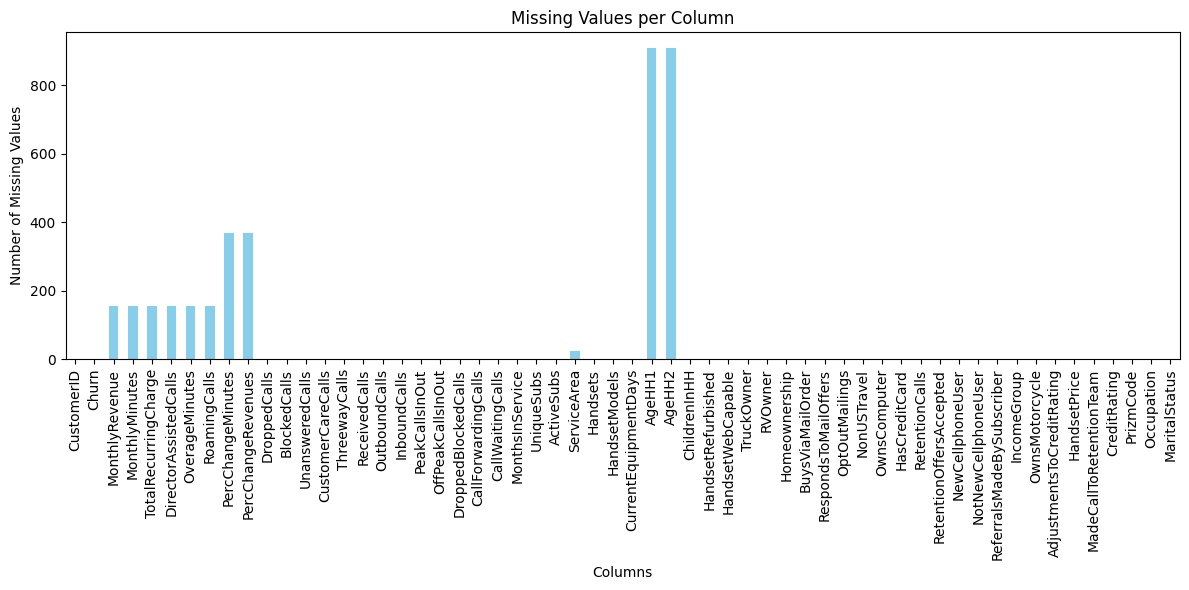

In [9]:
# 결측값 확인
missing_values = train.isnull().sum()
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### corr 상관관계 시각화

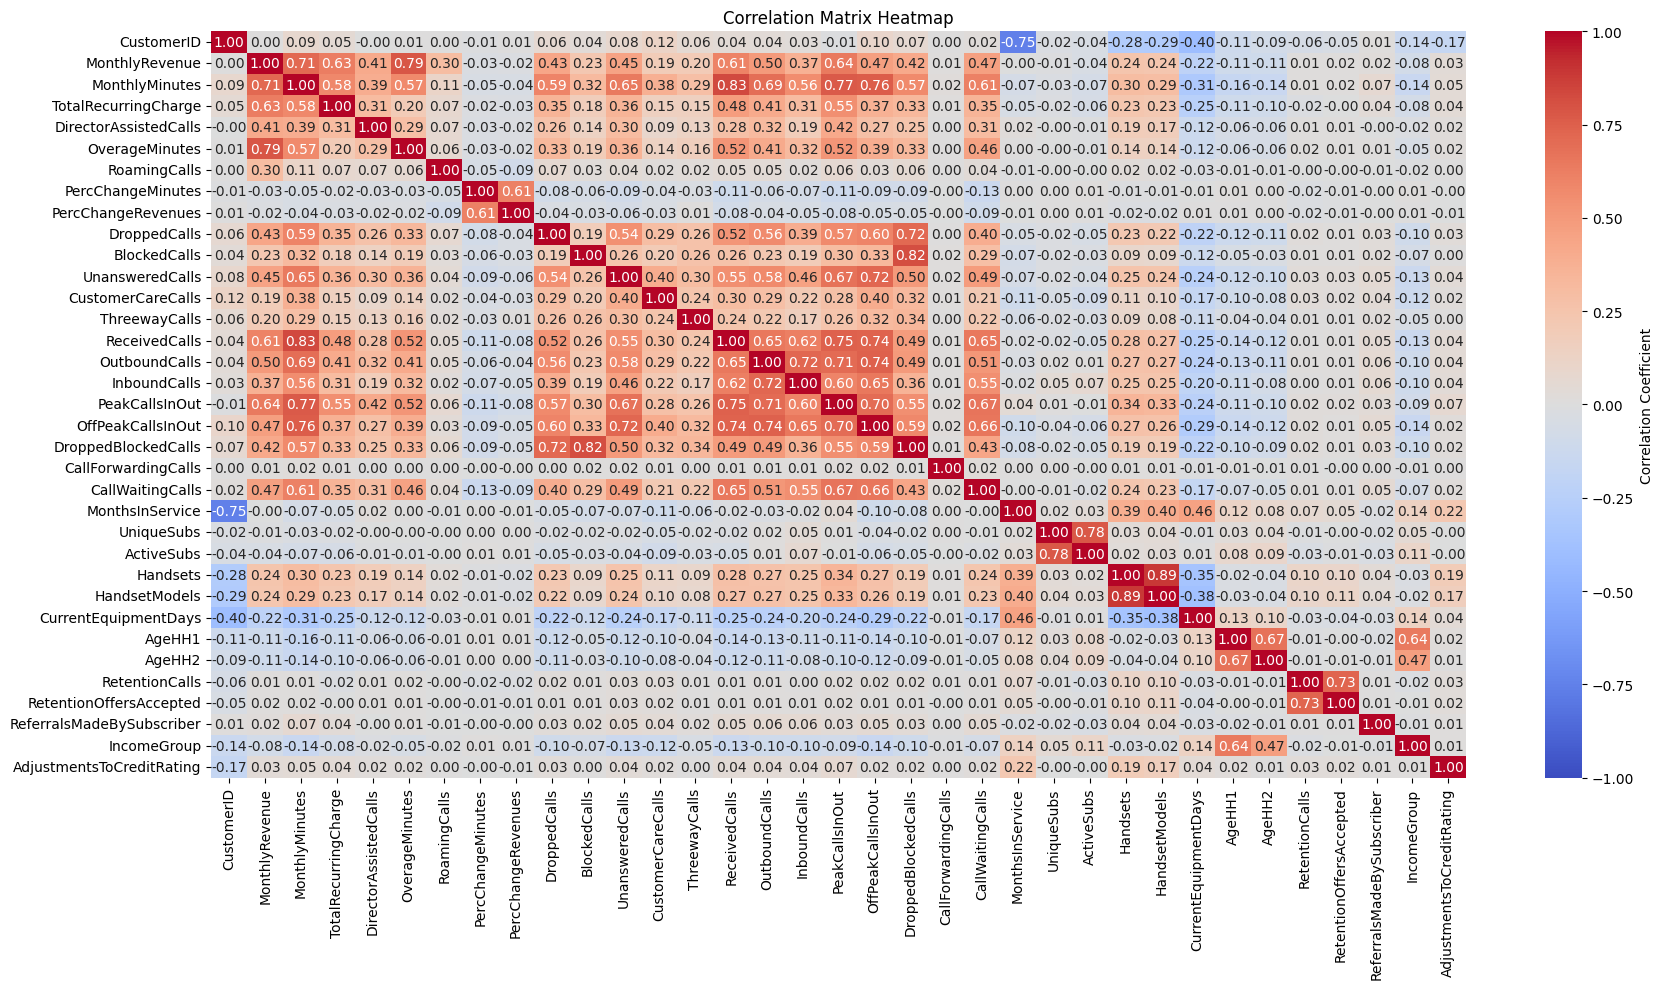

In [10]:
# 수치형 변수만을 사용한 상관관계 행렬 계산 및 시각화
numeric_data = train.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(18, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,       # 셀에 상관계수 값 표시
    fmt=".2f",        # 소수점 둘째 자리까지 표시
    cmap="coolwarm",  # 색상 맵 스타일
    vmin=-1, vmax=1,  # 상관계수 범위 고정
    cbar_kws={"label": "Correlation Coefficient"}  # 컬러바 라벨 추가
)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

## 변수 선정 : Recursive Feature Elimination

Bakcwards Selection

-Bagging 방식으로 예측

-종속변수에 대해서 Feature Importance가 낮은 독립변수 삭제

### 결측치 처리

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# 종속 변수의 결측치는 최빈값으로 대체
train['Churn'] = train['Churn'].fillna(train['Churn'].mode()[0])

In [12]:
# 숫자형과 범주형 열을 분리하여 결측치 처리
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

In [13]:
# 숫자형 열: 평균으로 대체
imputer_numeric = SimpleImputer(strategy='mean')
train[numeric_cols] = imputer_numeric.fit_transform(train[numeric_cols])
test[numeric_cols] = imputer_numeric.transform(test[numeric_cols])

In [14]:
# 범주형 열: 최빈값으로 대체
imputer_categorical = SimpleImputer(strategy='most_frequent')
train[categorical_cols] = imputer_categorical.fit_transform(train[categorical_cols])
test[categorical_cols] = imputer_categorical.transform(test[categorical_cols])

### 레이블 인코딩

In [15]:
# 훈련 및 테스트 데이터를 결합하여 범주형 열을 인코딩
combined_data = pd.concat([train, test], axis=0)

In [16]:
# 레이블 인코딩: 범주형 데이터를 수치형으로 변환
label_encoders = {}
for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    combined_data[column] = label_encoders[column].fit_transform(combined_data[column].astype(str))

In [17]:
# 인코딩된 데이터를 다시 train와 test로 분리
train = combined_data.iloc[:len(train), :].copy()
test = combined_data.iloc[len(train):, :].copy()

In [18]:
# 독립 변수와 종속 변수 분리
X_train = train.drop(columns=['Churn'])
y_train = train['Churn']
X_test = test.drop(columns=['Churn'], errors='ignore')

In [19]:
!pip install imbalanced-learn

먼저 train_test_split으로 Train과 Validation을 나누고, Train 데이터에 대해서만 Feature Selection을 수행한 뒤 그 결과를 Validation 세트에도 동일하게 적용해야 합니다.

전체 데이터로 중요도를 계산하면 Validation 세트의 정보가 미리 반영되어, 모델이 평가 시 과대적합되는 경향을 보이게 되며 실제 성능은 떨어질 수 있습니다.

In [20]:
from sklearn.model_selection import train_test_split

#데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

def get_top_features(X_train, y_train, n_features=30, n_splits=5, random_state=42):
    
    feature_importances = np.zeros(X_train.shape[1])
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # 교차 검증 기반 Feature Importance 계산
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_fold_train, y_fold_train = X_train.iloc[train_idx], y_train.iloc[train_idx]
        model = RandomForestClassifier(random_state=random_state, n_jobs=-1)
        model.fit(X_fold_train, y_fold_train)
        feature_importances += model.feature_importances_

    # 평균 Feature Importance 계산
    feature_importances /= n_splits

    # 상위 n_features개의 중요한 특성 선택
    top_features_idx = np.argsort(feature_importances)[-n_features:][::-1]
    top_features = X_train.columns[top_features_idx]
    return top_features

# 사용 예제
# X_train: 독립 변수 DataFrame
# y_train: 종속 변수 Series
top_features = get_top_features(X_train, y_train, n_features=30)
print("상위 30개의 중요한 특성:", top_features)


상위 30개의 중요한 특성: Index(['CurrentEquipmentDays', 'PercChangeMinutes', 'CustomerID',
       'MonthlyMinutes', 'MonthlyRevenue', 'PercChangeRevenues', 'ServiceArea',
       'MonthsInService', 'PeakCallsInOut', 'OffPeakCallsInOut',
       'ReceivedCalls', 'UnansweredCalls', 'OutboundCalls',
       'DroppedBlockedCalls', 'TotalRecurringCharge', 'DroppedCalls', 'AgeHH1',
       'InboundCalls', 'OverageMinutes', 'BlockedCalls', 'AgeHH2',
       'DirectorAssistedCalls', 'IncomeGroup', 'RoamingCalls',
       'CustomerCareCalls', 'CreditRating', 'CallWaitingCalls', 'PrizmCode',
       'HandsetPrice', 'UniqueSubs'],
      dtype='object')


In [22]:
X_train = X_train[top_features]
X_test = X_test[top_features]
X_val = X_val[top_features]

SMOTE 적용은 반드시 Train 데이터에만 해야 하고, 이후에 StandardScaler를 Train 세트에 fit하고, Validation/Test 세트는 transform만 해야 합니다.

다른 순서로 스케일링이나 SMOTE를 적용했다면, 데이터 분포 왜곡으로 성능 저하가 발생할 수 있습니다.

In [23]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 원하는 소수 클래스 비율 설정
desired_ratio = 0.8  # 소수 클래스가 다수 클래스의 80%가 되도록 설정

# 다수 클래스와 소수 클래스 개수 확인
majority_class_count = y_train.value_counts()[0]  # Churn=0
minority_class_count = y_train.value_counts()[1]  # Churn=1

# SMOTE의 sampling_strategy 계산
if desired_ratio <= 1.0:
    sampling_strategy = desired_ratio  # 비율로 설정
else:
    # 목표 소수 클래스 수를 지정
    target_minority_count = int(majority_class_count * desired_ratio)
    sampling_strategy = {0: majority_class_count, 1: target_minority_count}

# SMOTE 초기화 및 적용
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 결과 확인
print("원본 데이터 클래스 분포:")
print(y_train.value_counts())
print("\nSMOTE 적용 후 클래스 분포:")
print(pd.Series(y_train_resampled).value_counts())


원본 데이터 클래스 분포:
Churn
0    29028
1    11809
Name: count, dtype: int64

SMOTE 적용 후 클래스 분포:
Churn
0    29028
1    23222
Name: count, dtype: int64


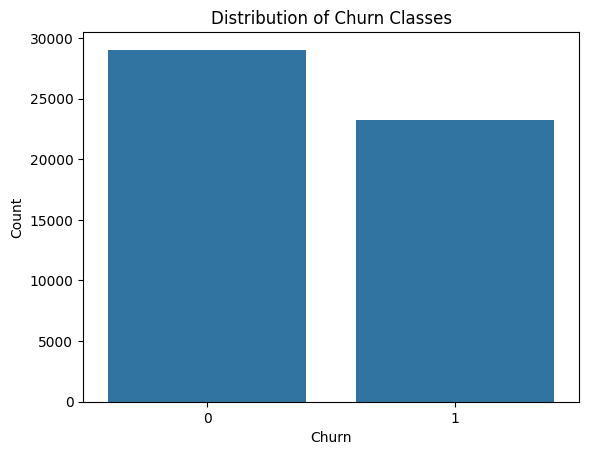

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
smote_data = pd.DataFrame({'Churn': y_train_resampled})
# Churn 컬럼의 클래스 분포를 countplot으로 시각화
sns.countplot(x= 'Churn', data= smote_data)
plt.title('Distribution of Churn Classes')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [25]:
from sklearn.preprocessing import StandardScaler

# Standard Scaler 초기화
scaler = StandardScaler()

# 숫자형 데이터 정규화 적용
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [26]:
print(X_train_scaled.shape)
print(y_train_resampled.shape)

print(type(X_train_scaled))
print(type(y_train_resampled))

print(type(y_train_resampled))

(52250, 30)
(52250,)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


### 시각화

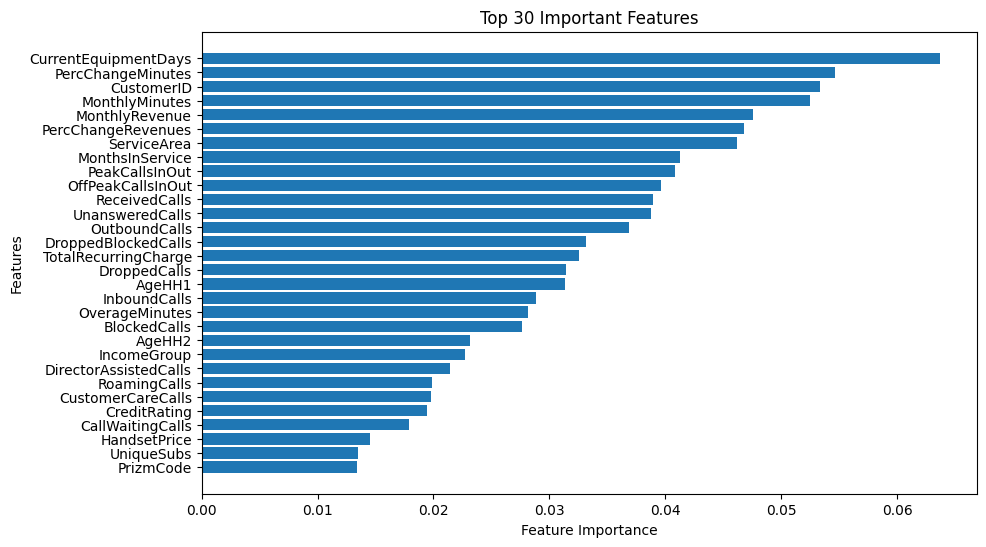

In [27]:
import matplotlib.pyplot as plt

def plot_top_features(X_train, feature_importances, top_features):
    """
    상위 중요한 특성을 막대 그래프로 시각화합니다.
    
    Args:
        X_train (pd.DataFrame): 독립 변수 데이터 (전체 컬럼 이름).
        feature_importances (np.array): 전체 특성의 중요도 배열.
        top_features (pd.Index): 상위 n개의 중요한 특성 이름.
    """
    # 상위 특성의 중요도 추출
    top_importances = feature_importances[X_train.columns.get_indexer(top_features)]
    
    # 정렬
    sorted_idx = np.argsort(top_importances)[::-1]  # 중요도 내림차순
    top_features_sorted = top_features[sorted_idx]
    top_importances_sorted = top_importances[sorted_idx]
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(top_features_sorted, top_importances_sorted)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Top 30 Important Features')
    plt.gca().invert_yaxis()  # 중요도가 높은 특성을 위로
    plt.show()

# 예제: Feature Importance와 Top Features 전달
feature_importances = np.zeros(X_train.shape[1])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Feature Importance 계산 (기존 함수 내용)
for train_idx, val_idx in cv.split(X_train, y_train):
    X_fold_train, y_fold_train = X_train.iloc[train_idx], y_train.iloc[train_idx]
    model = RandomForestClassifier(random_state=42, n_jobs=-1)
    model.fit(X_fold_train, y_fold_train)
    feature_importances += model.feature_importances_

# 평균 Feature Importance 계산
feature_importances /= 5

# 상위 30개 특성 시각화
plot_top_features(X_train, feature_importances, top_features)


In [28]:
# 최종 변수 목록 출력
print("최종 선정된 변수 목록:")
print(top_features)

최종 선정된 변수 목록:
Index(['CurrentEquipmentDays', 'PercChangeMinutes', 'CustomerID',
       'MonthlyMinutes', 'MonthlyRevenue', 'PercChangeRevenues', 'ServiceArea',
       'MonthsInService', 'PeakCallsInOut', 'OffPeakCallsInOut',
       'ReceivedCalls', 'UnansweredCalls', 'OutboundCalls',
       'DroppedBlockedCalls', 'TotalRecurringCharge', 'DroppedCalls', 'AgeHH1',
       'InboundCalls', 'OverageMinutes', 'BlockedCalls', 'AgeHH2',
       'DirectorAssistedCalls', 'IncomeGroup', 'RoamingCalls',
       'CustomerCareCalls', 'CreditRating', 'CallWaitingCalls', 'PrizmCode',
       'HandsetPrice', 'UniqueSubs'],
      dtype='object')


## Grid Search

- 모델의 하이퍼 파라미터 조합을 순차적으로 입력하면서 가장 성능이 좋은 조합을 탐색
- Train set 내에서 입력 받은 후보 파라미터 조합을 모두 탐색

In [29]:
from sklearn.model_selection import GridSearchCV
import pickle

# GridSearchCV를 수행하는 함수
def grid_search_hyperparameters(model, param_grid, X_train_scaled, y_train_resampled):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,  # 탐색할 파라미터 그리드
        scoring='roc_auc',     # 평가 기준
        cv=5,                   # 교차 검증 폴드 수
        verbose=3,
        n_jobs=-1               # 병렬 처리
    )
    grid_search.fit(X_train_scaled, y_train_resampled)
    print("최적의 하이퍼파라미터:", grid_search.best_params_)
    print("최고 성능 (ROC AUC):", grid_search.best_score_)
    return grid_search.best_params_, grid_search.best_score_

### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

lgbm_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2, 5, 10],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'n_jobs': [3]
}


lgbm_best_params, lgbm_best_score = grid_search_hyperparameters(lgbm, lgbm_param_grid, X_train_scaled, y_train_resampled)

Fitting 5 folds for each of 13824 candidates, totalling 69120 fits
[LightGBM] [Info] Number of positive: 18578, number of negative: 23222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.158155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6889
[LightGBM] [Info] Number of data points in the train set: 41800, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444450 -> initscore=-0.223122
[LightGBM] [Info] Start training from score -0.223122
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=-1, min_child_samples=20, n_estimators=100, n_jobs=3, num_leaves=31, reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=0.8;, score=0.930 total time=   4.7s
[LightGBM] [Info] Number of positive: 18577, number of negative: 23223
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003050 seconds.
You can set `force_col_wise=true` to

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],         # None이면 제한 없음
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced'],      # 불균형 데이터 보정
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1]       # 가지치기
}

dt_best_params, dt_best_score = grid_search_hyperparameters(decision_tree, dt_param_grid, X_train_scaled, y_train_resampled)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],       # 이웃 수
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}


knn_best_params, knn_best_score = grid_search_hyperparameters(knn, knn_param_grid, X_train_scaled, y_train_resampled)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200, 300],         # 트리 개수
    'max_depth': [None, 10, 30, 50],         # 깊이 제한
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']       # 불균형 보정    
}



rf_best_params, rf_best_score = grid_search_hyperparameters(random_forest, rf_param_grid, X_train_scaled, y_train_resampled)

### Neural Net

In [ ]:
from sklearn.neural_network import MLPClassifier

neural_net = MLPClassifier(max_iter=1000, random_state=42)

nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    # 'learning_rate_init': [0.001, 0.01],
    # 'early_stopping': [True, False],
    # 'batch_size': [32, 64, 128]
}

nn_best_params, nn_best_score = grid_search_hyperparameters(neural_net, nn_param_grid, X_train_scaled, y_train_resampled)

## Random Search

In [1]:
from sklearn.model_selection import RandomizedSearchCV
import pickle

# RandomizedSearchCV를 수행하는 함수
def random_search_hyperparameters(model, param_distributions, X_train_scaled, y_train_resampled, n_iter=50):
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions,
        n_iter=n_iter,  # 탐색할 조합 수
        scoring='roc_auc',  # 평가 기준
        cv=5,  # 교차 검증 폴드 수
        verbose=3,
        random_state=42,
        n_jobs=-1  # 병렬 처리
    )
    random_search.fit(X_train_scaled, y_train_resampled)
    print("최적의 하이퍼파라미터:", random_search.best_params_)
    print("최고 성능 (f1 score):", random_search.best_score_)
    return random_search.best_params_, random_search.best_score_


/home/kgb/venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

param_distributions = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2, 5, 10],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'n_jobs': [3]
}

lgbm_best_params, lgbm_best_score = random_search_hyperparameters(lgbm, param_distributions, X_train_scaled, y_train_resampled)


### Decison Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)

param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],         # None이면 제한 없음
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced'],      # 불균형 데이터 보정
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1]       # 가지치기
}


dt_best_params, dt_best_score = random_search_hyperparameters(decision_tree, param_distributions, X_train_scaled, y_train_resampled)


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_distributions = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],       # 이웃 수
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

knn_best_params, knn_best_score = random_search_hyperparameters(knn, param_distributions, X_train_scaled, y_train_resampled)


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)

param_distributions = {
    'n_estimators': [100, 200, 300],         # 트리 개수
    'max_depth': [None, 10, 30, 50],         # 깊이 제한
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']       # 불균형 보정    
}

rf_best_params, rf_best_score = random_search_hyperparameters(random_forest, param_distributions, X_train_scaled, y_train_resampled)


### Neural Net

In [ ]:
from sklearn.neural_network import MLPClassifier

neural_net = MLPClassifier(max_iter=1000, random_state=42)

param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    # 'learning_rate_init': [0.001, 0.01],
    # 'early_stopping': [True, False],
    # 'batch_size': [32, 64, 128]
}

nn_best_params, nn_best_score = random_search_hyperparameters(neural_net, param_distributions, X_train_scaled, y_train_resampled)


### SVM

In [ ]:
# from sklearn.svm import SVC

# svm = SVC(random_state=42)

# param_distributions = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [0.1, 0.01, 0.001],
#     'kernel': ['linear', 'sigmoid']
# }

# svm_best_params, svm_best_score = random_search_hyperparameters(svm, param_distributions, X_train_scaled, y_train_resampled)


## Best parameters

In [ ]:
# 결과 통합
best_params = {
    "Decision Tree": {"params": dt_best_params, "score": dt_best_score},
    "KNN": {"params": knn_best_params, "score": knn_best_score},
    "Random Forest": {"params": rf_best_params, "score": rf_best_score},
    "LightGBM": {"params": lgbm_best_params, "score": lgbm_best_score},
    "Neural Net": {"params": nn_best_params, "score": nn_best_score}
}

# Pickle 파일로 저장
with open("best_model_params11(Radonsearch, ROC AUC).pkl", "wb") as f:
    pickle.dump(best_params, f)
print("최적의 하이퍼파라미터와 성능이 저장되었습니다.")



In [ ]:
import pickle

# 저장된 파일에서 결과 복원
with open("best_model_params11(Randomsearch, ROC AUC).pkl", "rb") as f:
    loaded_best_params = pickle.load(f)

# 확인
for model, details in loaded_best_params.items():
    print(f"Model: {model}")
    print(f"Best Parameters: {details['params']}")
    print(f"Best Score: {details['score']:.4f}")
    print("-" * 50)


In [ ]:
dt_best_params = loaded_best_params['Decision Tree']['params']
knn_best_params = loaded_best_params['KNN']['params']
rf_best_params = loaded_best_params['Random Forest']['params']
lgbm_best_params = loaded_best_params['LightGBM']['params']
nn_best_params =loaded_best_params['Neural Net']['params']

In [ ]:
print("Decision Tree:", dt_best_params)
print("KNN:", knn_best_params)
print("Random Forest:", rf_best_params)
print("LightGBM:", lgbm_best_params)
print("Neural Net:", nn_best_params)

## 성과 비교

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score

# 1) 임계값에 따른 F1 (혹은 다른 지표) 최대값 찾는 함수
def find_best_threshold(model, X_val, y_val, step=0.05):
    """
    model: 이미 fit()된 모델
    X_val: 검증용 Feature
    y_val: 검증용 Label
    step : 탐색할 임계값 간격 (0.05 등)
    
    return: (best_threshold, best_f1)
    """
    y_proba = model.predict_proba(X_val_scaled)[:, 1]  # Positive 클래스 확률
    thresholds = np.arange(0.0, 1.0, step)
    
    best_thresh = 0.5
    best_f1 = 0.0
    
    for thr in thresholds:
        y_pred_temp = (y_proba >= thr).astype(int)
        f1_temp = f1_score(y_val, y_pred_temp, zero_division=1)
        if f1_temp > best_f1:
            best_f1 = f1_temp
            best_thresh = thr
    
    return best_thresh, best_f1

In [ ]:
# 2) 성능 지표 계산 함수
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Confusion matrix 요소

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Specificity": specificity,
        "Negative Predictive Value": npv
    }

In [ ]:
# 3) 모델 리스트 및 평가
results = {}

models = {
    "Decision Tree": DecisionTreeClassifier(**dt_best_params, random_state=42),
    "KNN": KNeighborsClassifier(**knn_best_params),
    "Random Forest": RandomForestClassifier(**rf_best_params, random_state=42),
    "LightGBM": LGBMClassifier(**lgbm_best_params, random_state=42),
    "Neural Net": MLPClassifier(**nn_best_params, random_state=42)
}

for name, model in models.items():
    # (a) 학습
    model.fit(X_train_scaled, y_train_resampled)
    
    # (b) Threshold 탐색 (predict_proba가 가능한 모델에만)
    if hasattr(model, "predict_proba"):
        best_thresh, best_f1 = find_best_threshold(model, X_val_scaled, y_val, step=0.05)
        
        # 최적 Threshold로 최종 예측
        y_proba = model.predict_proba(X_val_scaled)[:, 1]
        y_pred = (y_proba >= best_thresh).astype(int)
        
        # 성능 지표 계산
        metrics = calculate_metrics(y_val, y_pred)
        
        # 결과 저장
        results[name] = {
            "Best Threshold": best_thresh,
            "Best F1": best_f1,
            **metrics
        }
    else:
        # predict_proba가 없는 모델의 경우 (ex. SVC with kernel='linear' 등)
        y_pred = model.predict(X_val_scaled)
        metrics = calculate_metrics(y_val, y_pred)
        
        results[name] = metrics

In [ ]:
# 4) 결과 확인
for name, metric_dict in results.items():
    print(f"Model: {name}")
    for k, v in metric_dict.items():
        print(f"  {k}: {v}")
    print("--------------------------------------------------")

### Accuracy

### Precison

### Recall

### F1 score